In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [88]:
data=pd.read_csv('/users/brandonk87/downloads/heartdisease_train.csv')
data['gender'].replace(['female','male'],[0,1],inplace=True)
data['TenYearCHD'].replace(['no','yes'],[0,1],inplace=True)
data=data.drop("education", axis=1)
data

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,50,0,0,0,0,0,0,254,133.0,76.0,NaN,75,76,0
1,0,43,0,0,0,0,0,0,247,131.0,88.0,27.64,72,61,0
2,1,46,1,15,0,0,1,0,294,142.0,94.0,26.31,98,64,0
3,0,41,0,0,1,0,1,0,332,124.0,88.0,31.31,65,84,0
4,0,38,1,20,0,0,1,0,221,140.0,90.0,21.35,95,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,1,58,0,0,0,0,1,0,187,141.0,81.0,24.96,80,81,0
3642,1,68,0,0,0,0,1,0,176,168.0,97.0,23.14,60,79,1
3643,1,50,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
3644,1,51,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0


# Multiple Stochastic Regression Based Imputation

In [89]:
data_test5 = data[data['BMI'].isnull()==True]
data_train5 = data[data['BMI'].isnull()==False]

lm5 = sm.OLS(data_train5[['BMI']], sm.add_constant(data_train5[["gender","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","heartRate","glucose"]])).fit()

mean = lm5.predict(sm.add_constant(data_test5[["gender","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","heartRate","glucose"]]))
std = lm5.resid.std()

model = []
coef = np.zeros((15,5))
for i in range(0,5):
    rand_pred = np.random.normal(size = data_test5.shape[0],loc = mean, scale = std)
    data_test5.BMI = rand_pred
    data5 = pd.concat([data_train5,data_test5])

coef.mean(axis=1)
data5

/var/folders/2x/twxymrtj0lvf3zk7bx9vsjyr0000gn/T/ipykernel_11408/3267769653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test5.BMI = rand_pred
/var/folders/2x/twxymrtj0lvf3zk7bx9vsjyr0000gn/T/ipykernel_11408/3267769653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test5.BMI = rand_pred
/var/folders/2x/twxymrtj0lvf3zk7bx9vsjyr0000gn/T/ipykernel_11408/3267769653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,0,43,0,0,0,0,0,0,247,131.0,88.0,27.640000,72,61,0
2,1,46,1,15,0,0,1,0,294,142.0,94.0,26.310000,98,64,0
3,0,41,0,0,1,0,1,0,332,124.0,88.0,31.310000,65,84,0
4,0,38,1,20,0,0,1,0,221,140.0,90.0,21.350000,95,70,1
5,1,48,1,10,0,0,1,0,232,138.0,90.0,22.370000,64,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,0,61,0,0,0,0,0,0,271,133.0,83.0,28.272971,90,60,1
3616,1,63,1,10,0,0,0,1,240,146.0,84.0,32.608256,75,120,0
3627,0,63,0,0,0,0,1,1,236,155.0,82.0,24.547651,78,79,0
3630,0,52,0,0,0,0,0,0,265,137.5,84.5,28.124019,72,86,0


In [90]:
data_train=data5
data_train

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,0,43,0,0,0,0,0,0,247,131.0,88.0,27.640000,72,61,0
2,1,46,1,15,0,0,1,0,294,142.0,94.0,26.310000,98,64,0
3,0,41,0,0,1,0,1,0,332,124.0,88.0,31.310000,65,84,0
4,0,38,1,20,0,0,1,0,221,140.0,90.0,21.350000,95,70,1
5,1,48,1,10,0,0,1,0,232,138.0,90.0,22.370000,64,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,0,61,0,0,0,0,0,0,271,133.0,83.0,28.272971,90,60,1
3616,1,63,1,10,0,0,0,1,240,146.0,84.0,32.608256,75,120,0
3627,0,63,0,0,0,0,1,1,236,155.0,82.0,24.547651,78,79,0
3630,0,52,0,0,0,0,0,0,265,137.5,84.5,28.124019,72,86,0


# Loading in the test set

In [124]:
data_test=pd.read_csv('/users/brandonk87/downloads/heartdisease_test.csv')
data_test['gender'].replace(['female','male'],[0,1],inplace=True)
data_test['TenYearCHD'].replace(['no','yes'],[0,1],inplace=True)
data_test=data_test.drop("education", axis=1)
data_test

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
1,0,46,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
2,1,48,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
3,0,61,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
4,0,46,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
5,0,43,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0
6,0,63,0,0,0,0,0,0,205,138.0,71,33.11,60,85,1
7,0,45,1,20,0,0,0,0,313,100.0,71,21.68,79,78,0
8,1,52,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0
9,1,43,1,30,0,0,1,0,225,162.0,107,23.61,93,88,0


In [96]:
x_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1:]
x_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1:]

# Imbalanced Data

In [102]:
lr1 = sm.Logit(y_train, sm.add_constant(x_train)).fit()
print(lr1.summary())
p_pred = lr1.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

Optimization terminated successfully.
         Current function value: 0.376701
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3646
Model:                          Logit   Df Residuals:                     3631
Method:                           MLE   Df Model:                           14
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.1169
Time:                        16:01:15   Log-Likelihood:                -1373.5
converged:                       True   LL-Null:                       -1555.2
Covariance Type:            nonrobust   LLR p-value:                 6.189e-69
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6046      0.697    -12.342      0.000      -9.971      -7.238
gender        

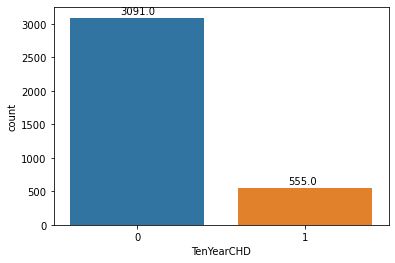

In [98]:
import seaborn as sns
ax = sns.countplot(x=y_train["TenYearCHD"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [101]:
555/(555+3091)

0.15222161272627538

In [103]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

0.8
[[8 0]
 [2 0]]


# Method 1: Undersampling

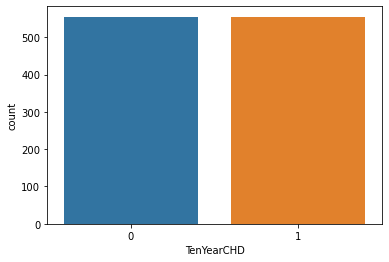

In [110]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 0)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

ax = sns.countplot(x=y_train_under["TenYearCHD"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [111]:
lr1 = sm.Logit(y_train_under, sm.add_constant(x_train_under)).fit()
print(lr1.summary())
p_pred = lr1.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

Optimization terminated successfully.
         Current function value: 0.611248
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1110
Model:                          Logit   Df Residuals:                     1095
Method:                           MLE   Df Model:                           14
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.1182
Time:                        16:09:31   Log-Likelihood:                -678.49
converged:                       True   LL-Null:                       -769.39
Covariance Type:            nonrobust   LLR p-value:                 2.771e-31
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.5618      0.945     -6.945      0.000      -8.414      -4.710
gender        

In [112]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))
print("F1 Score:", f1_score(y_test, y_pred))
print("Misclassification Rate:", (fp+fn)/len(y_test))

Recall: 1.0
Precision: 0.5
F1 Score: 0.6666666666666666
Misclassification Rate: 0.2


AUC for precision-recall curve: 0.7083333333333333
AP score: 0.75


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


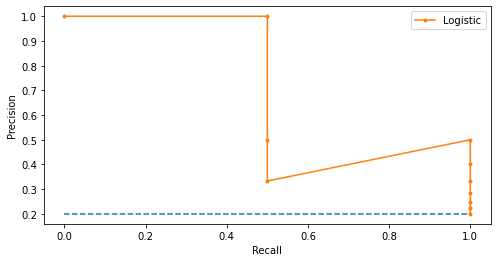

In [113]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred)

plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print("AUC for precision-recall curve:", auc(lr_recall, lr_precision))
print("AP score:", average_precision_score(y_test, p_pred))


# Method 2: Oversampling

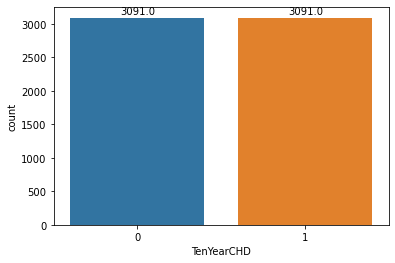

In [116]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 0)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

ax = sns.countplot(x=y_train_over["TenYearCHD"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [117]:
lr1 = sm.Logit(y_train_over, sm.add_constant(x_train_over)).fit()
print(lr1.summary())
p_pred = lr1.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

Optimization terminated successfully.
         Current function value: 0.602677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6182
Model:                          Logit   Df Residuals:                     6167
Method:                           MLE   Df Model:                           14
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.1305
Time:                        16:14:21   Log-Likelihood:                -3725.8
converged:                       True   LL-Null:                       -4285.0
Covariance Type:            nonrobust   LLR p-value:                5.487e-230
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.7832      0.396    -17.124      0.000      -7.560      -6.007
gender        

In [118]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))
print("F1 Score:", f1_score(y_test, y_pred))
print("Misclassification Rate:", (fp+fn)/len(y_test))

Recall: 1.0
Precision: 0.4
F1 Score: 0.5714285714285715
Misclassification Rate: 0.3


AUC for precision-recall curve: 0.7083333333333333
AP score: 0.75


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


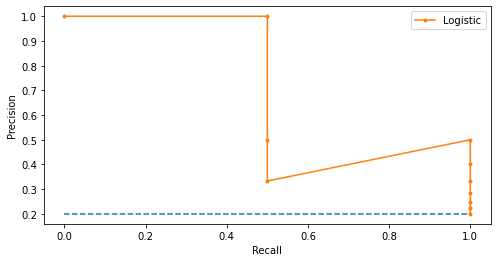

In [119]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred)

plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print("AUC for precision-recall curve:", auc(lr_recall, lr_precision))
print("AP score:", average_precision_score(y_test, p_pred))

# Method 3: Cost Sensitive Learning

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='newton-cg', max_iter=1000, class_weight='balanced')

lr = model.fit(x_train,y_train.values.ravel())
print(lr.coef_)
print(lr.intercept_)
print(lr.predict(x_test))
print(metrics.accuracy_score(y_test, lr.predict(x_test)))

y_pred = lr.predict(x_test)

[[ 0.51817807  0.06665036  0.15198493  0.01666278  0.24349615  0.57589116
   0.24566482  0.17644296  0.00224792  0.01437547 -0.00383833  0.0144799
  -0.00235719  0.00545249]]
[-6.88265752]
[0 0 0 1 0 0 1 0 1 1]
0.8


In [121]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))
print("F1 Score:", f1_score(y_test, y_pred))
print("Misclassification Rate:", (fp+fn)/len(y_test))

Recall: 1.0
Precision: 0.5
F1 Score: 0.6666666666666666
Misclassification Rate: 0.2


AUC for precision-recall curve: 0.7916666666666666
AP score: 0.8333333333333333


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


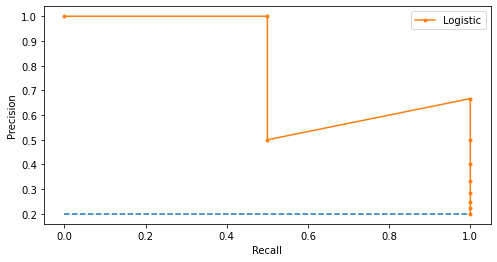

In [122]:
p_pred = lr.predict_proba(x_test)

mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred[:,1])

plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print("AUC for precision-recall curve:", auc(lr_recall, lr_precision))
print("AP score:", average_precision_score(y_test, p_pred[:,1]))